# How well do jobs and skills pay for Data Analysts?

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\vlad\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."


In [3]:
df_US_for_DA = df[df['job_country'] == 'United States'][df['job_title_short'] == 'Data Analyst'].copy()
df_US_for_DA_exploded = df_US_for_DA.explode('job_skills').dropna(subset=['salary_year_avg'])
df_US_for_DA_exploded
top_skills = df_US_for_DA_exploded['job_skills'].value_counts().index.tolist()[:5]
pivot_table = df_US_for_DA_exploded.pivot_table(index='job_skills', values= 'salary_year_avg', aggfunc='median').reset_index()
pivot_table_highest_salary = pivot_table.sort_values(by='salary_year_avg', ascending=False).head(10)
pivot_table_Best_skill_salary = pivot_table[pivot_table['job_skills'].isin(top_skills)]

C:\Users\vlad\AppData\Local\Temp\ipykernel_4980\4033841646.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_US_for_DA = df[df['job_country'] == 'United States'][df['job_title_short'] == 'Data Analyst'].copy()


C:\Users\vlad\AppData\Local\Temp\ipykernel_4980\2726220127.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\vlad\AppData\Local\Temp\ipykernel_4980\2726220127.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


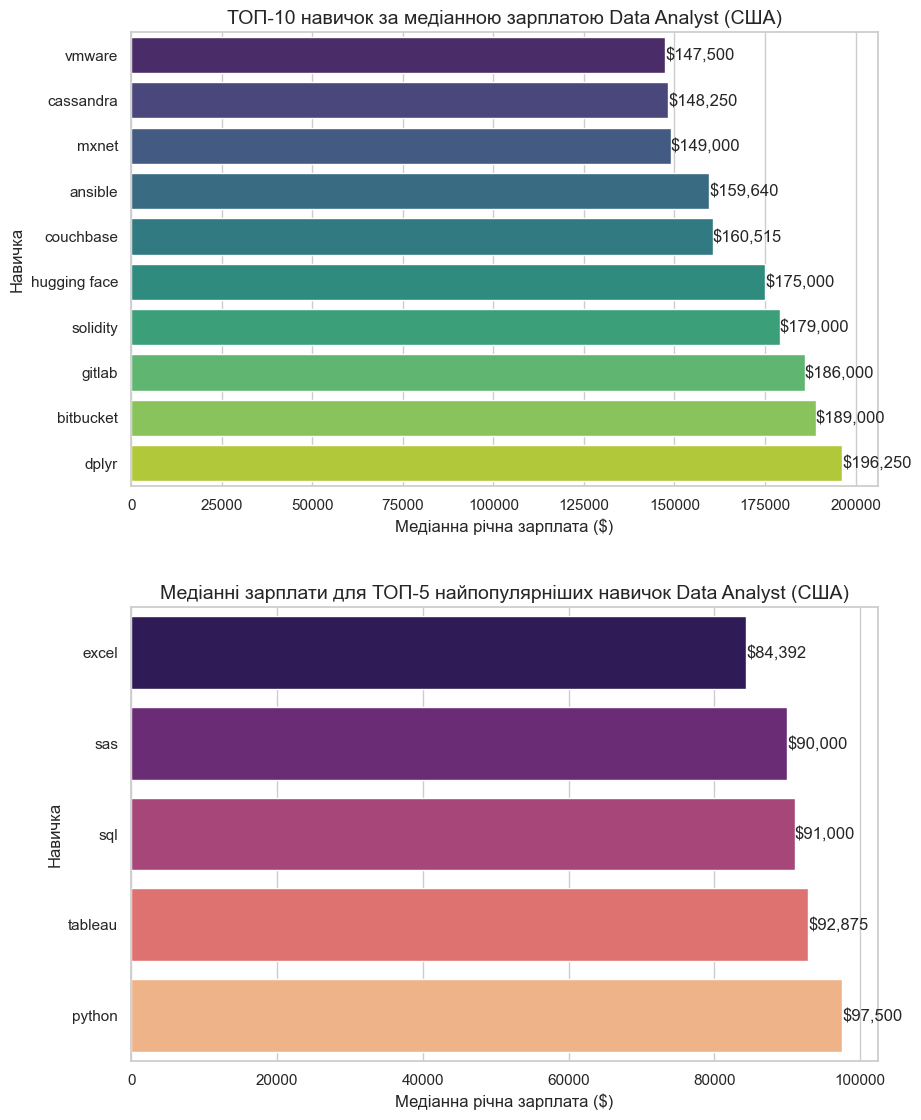

In [ ]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(2, 1, figsize=(10, 12)) 

# --- Графік 1: ТОП-10 навичок за медіанною зарплатою (highest salary) ---
sns.barplot(
    ax=axes[0],               
    x='salary_year_avg',      
    y='job_skills',           
    data=pivot_table_highest_salary.sort_values(by='salary_year_avg', ascending=True), 
    palette='viridis'         
)
axes[0].set_title('ТОП-10 навичок за медіанною зарплатою Data Analyst (США)', fontsize=14)
axes[0].set_xlabel('Медіанна річна зарплата ($)', fontsize=12)
axes[0].set_ylabel('Навичка', fontsize=12)

for index, value in enumerate(pivot_table_highest_salary.sort_values(by='salary_year_avg', ascending=True)['salary_year_avg']):
    axes[0].text(value, index, f'${int(value):,}', va='center', ha='left') 

# --- Графік 2: ТОП-5 найпопулярніших навичок та їх зарплати ---
sns.barplot(
    ax=axes[1],              
    x='salary_year_avg',      
    y='job_skills',           
    data=pivot_table_Best_skill_salary.sort_values(by='salary_year_avg', ascending=True), 
    palette='magma'           
)
axes[1].set_title('Медіанні зарплати для ТОП-5 найпопулярніших навичок Data Analyst (США)', fontsize=14)
axes[1].set_xlabel('Медіанна річна зарплата ($)', fontsize=12)
axes[1].set_ylabel('Навичка', fontsize=12)
for index, value in enumerate(pivot_table_Best_skill_salary.sort_values(by='salary_year_avg', ascending=True)['salary_year_avg']):
    axes[1].text(value, index, f'${int(value):,}', va='center', ha='left') 

plt.tight_layout(pad=3.0) 
plt.show()